In [1]:
import HARK.ConsumptionSaving.ConsumerParameters as Params
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.ConsAggShockModel import (
    AggShockConsumerType,
    CobbDouglasEconomy,
    AggShockMarkovConsumerType,
    CobbDouglasMarkovEconomy,
)
from copy import deepcopy
def mystr(number):
    return "{:.4f}".format(number)

In [2]:
# Solve an AggShockConsumerType's microeconomic problem
solve_agg_shocks_micro = False
# Solve for the equilibrium aggregate saving rule in a CobbDouglasEconomy
solve_agg_shocks_market = True
# Solve an AggShockMarkovConsumerType's microeconomic problem
solve_markov_micro = False
# Solve for the equilibrium aggregate saving rule in a CobbDouglasMarkovEconomy
solve_markov_market = True
# Solve a simple Krusell-Smith-style two state, two shock model
solve_krusell_smith = True
# Solve a CobbDouglasEconomy with many states, potentially utilizing the "state jumper"
solve_poly_state = False

### Example impelementation of AggShockConsumerType

In [3]:
if solve_agg_shocks_micro or solve_agg_shocks_market:
    # Make an aggregate shocks consumer type
    AggShockExample = AggShockConsumerType()
    AggShockExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    EconomyExample = CobbDouglasEconomy(agents=[AggShockExample])
    EconomyExample.makeAggShkHist()  # Simulate a history of aggregate shocks

    # Have the consumers inherit relevant objects from the economy
    AggShockExample.getEconomyData(EconomyExample)

In [4]:
if solve_agg_shocks_micro:
    # Solve the microeconomic model for the aggregate shocks example type (and display results)
    t_start = process_time()
    AggShockExample.solve()
    t_end = process_time()
    print(
        "Solving an aggregate shocks consumer took "
        + mystr(t_end - t_start)
        + " seconds."
    )
    print(
        "Consumption function at each aggregate market resources-to-labor ratio gridpoint:"
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockExample.unpackcFunc()
    for M in AggShockExample.Mgrid.tolist():
        mMin = AggShockExample.solution[0].mNrmMin(M)
        c_at_this_M = AggShockExample.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
        plt.plot(m_grid + mMin, c_at_this_M)
    plt.ylim(0.0, None)
    plt.show()

Now solving for the equilibrium of a Cobb-Douglas economy.  This might take a few minutes...
intercept=-0.343892431186286, slope=1.104593288292029, r-sq=0.9968896217612445
intercept=-0.5036317603080784, slope=1.1516307652306579, r-sq=0.99558993623854
intercept=-0.45781284276113077, slope=1.1150500956007625, r-sq=0.9761544937568223
intercept=-0.3871208372015027, slope=1.0853000270407058, r-sq=0.9820100342330428
intercept=-0.3646746874098119, slope=1.0763760421084498, r-sq=0.9856903333255791
intercept=-0.3548104709407357, slope=1.07250161746339, r-sq=0.9860331018283293
intercept=-0.3504754703630661, slope=1.070813036044259, r-sq=0.9861654830885628
intercept=-0.3485780110442094, slope=1.0700786458110867, r-sq=0.9862204148294936
intercept=-0.3477516010972477, slope=1.0697604492756763, r-sq=0.9862437414876912
intercept=-0.34739343564383973, slope=1.0696231406893215, r-sq=0.986253720644644
intercept=-0.34723891990561373, slope=1.069564121912548, r-sq=0.9862579935066507
intercept=-0.347172532

/Users/ms/dev/HARK/HARK/ConsumptionSaving/ConsAggShockModel.py:1769: RuntimeWarning: divide by zero encountered in log
  Aagg = np.exp(self.intercept + self.slope*np.log(Mnow))


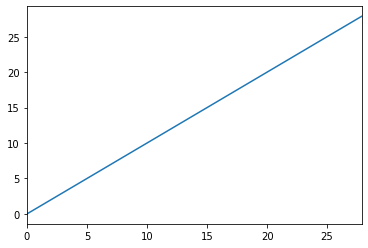

Consumption function at each aggregate market resources gridpoint (in general equilibrium):


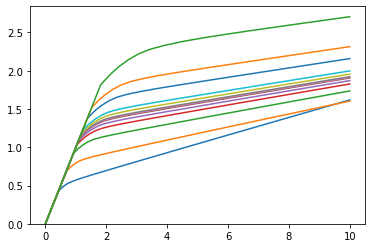

In [5]:
if solve_agg_shocks_market:
    # Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
    t_start = process_time()
    print(
        "Now solving for the equilibrium of a Cobb-Douglas economy.  This might take a few minutes..."
    )
    EconomyExample.solve()
    t_end = process_time()
    print(
        'Solving the "macroeconomic" aggregate shocks model took '
        + str(t_end - t_start)
        + " seconds."
    )

    print("Aggregate savings as a function of aggregate market resources:")
    plotFuncs(EconomyExample.AFunc, 0, 2 * EconomyExample.kSS)
    print(
        "Consumption function at each aggregate market resources gridpoint (in general equilibrium):"
    )
    AggShockExample.unpackcFunc()
    m_grid = np.linspace(0, 10, 200)
    AggShockExample.unpackcFunc()
    for M in AggShockExample.Mgrid.tolist():
        mMin = AggShockExample.solution[0].mNrmMin(M)
        c_at_this_M = AggShockExample.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
        plt.plot(m_grid + mMin, c_at_this_M)
    plt.ylim(0.0, None)
    plt.show()

### Example Implementations of AggShockMarkovConsumerType

In [6]:
if solve_markov_micro or solve_markov_market or solve_krusell_smith:
    # Make a Markov aggregate shocks consumer type
    AggShockMrkvExample = AggShockMarkovConsumerType()
    AggShockMrkvExample.IncomeDstn[0] = 2 * [AggShockMrkvExample.IncomeDstn[0]]
    AggShockMrkvExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    MrkvEconomyExample = CobbDouglasMarkovEconomy(agents=[AggShockMrkvExample])
    MrkvEconomyExample.DampingFac = 0.2  # Turn down damping
    MrkvEconomyExample.makeAggShkHist()  # Simulate a history of aggregate shocks
    AggShockMrkvExample.getEconomyData(
        MrkvEconomyExample
    )  # Have the consumers inherit relevant objects from the economy

In [7]:
if solve_markov_micro:
    # Solve the microeconomic model for the Markov aggregate shocks example type (and display results)
    t_start = process_time()
    AggShockMrkvExample.solve()
    t_end = process_time()
    print(
        "Solving an aggregate shocks Markov consumer took "
        + mystr(t_end - t_start)
        + " seconds."
    )

    print(
        "Consumption function at each aggregate market \
            resources-to-labor ratio gridpoint (for each macro state):"
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockMrkvExample.unpackcFunc()
    for i in range(2):
        for M in AggShockMrkvExample.Mgrid.tolist():
            mMin = AggShockMrkvExample.solution[0].mNrmMin[i](M)
            c_at_this_M = AggShockMrkvExample.cFunc[0][i](
                m_grid + mMin, M * np.ones_like(m_grid)
            )
            plt.plot(m_grid + mMin, c_at_this_M)
        plt.ylim(0.0, None)
        plt.show()

Now solving a two-state Markov economy.  This should take a few minutes...
intercept=[-0.45457028863479326, -0.5608165406907654], slope=[1.1215368972825372, 1.178334499213271], r-sq=[0.9981555551235348, 0.9936211956825644]
intercept=[-0.39063438982463117, -0.44292984675023017], slope=[1.0773896585972575, 1.0964491558602392], r-sq=[0.9998539446156635, 0.9996166998511072]
intercept=[-0.3375826098429694, -0.38469230352004224], slope=[1.0657220737945672, 1.0800826397775194], r-sq=[0.999923540564709, 0.999893702729503]
intercept=[-0.34438955842820446, -0.3938944194405977], slope=[1.0688335020439343, 1.0837845833652027], r-sq=[0.9999202360448058, 0.9998929405844074]
intercept=[-0.34513135214708335, -0.39438330618459266], slope=[1.0691336344455975, 1.0839898637364869], r-sq=[0.9999195924017966, 0.9998911821689769]
intercept=[-0.3452067391631015, -0.39440757767055756], slope=[1.0691611379897035, 1.084000818643343], r-sq=[0.9999195629192332, 0.9998910731648093]
Solving the "macroeconomic" aggre

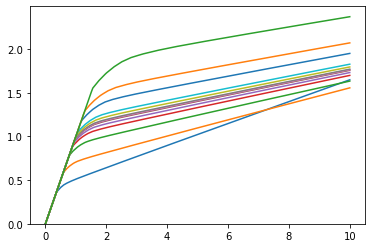

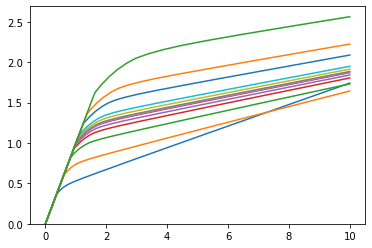

In [8]:
if solve_markov_market:
    # Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
    t_start = process_time()
    print("Now solving a two-state Markov economy.  This should take a few minutes...")
    MrkvEconomyExample.solve()
    t_end = process_time()
    print(
        'Solving the "macroeconomic" aggregate shocks model took '
        + str(t_end - t_start)
        + " seconds."
    )

    print(
        "Consumption function at each aggregate market \
            resources-to-labor ratio gridpoint (for each macro state):"
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockMrkvExample.unpackcFunc()
    for i in range(2):
        for M in AggShockMrkvExample.Mgrid.tolist():
            mMin = AggShockMrkvExample.solution[0].mNrmMin[i](M)
            c_at_this_M = AggShockMrkvExample.cFunc[0][i](
                m_grid + mMin, M * np.ones_like(m_grid)
            )
            plt.plot(m_grid + mMin, c_at_this_M)
        plt.ylim(0.0, None)
        plt.show()

In [9]:
if solve_krusell_smith:
    # Make a Krusell-Smith agent type
    # NOTE: These agents aren't exactly like KS, as they don't have serially correlated unemployment
    KSexampleType = deepcopy(AggShockMrkvExample)
    KSexampleType.IncomeDstn[0] = [
        [np.array([0.96, 0.04]), np.array([1.0, 1.0]), np.array([1.0 / 0.96, 0.0])],
        [np.array([0.90, 0.10]), np.array([1.0, 1.0]), np.array([1.0 / 0.90, 0.0])],
    ]

    # Make a KS economy
    KSeconomy = deepcopy(MrkvEconomyExample)
    KSeconomy.agents = [KSexampleType]
    KSeconomy.AggShkDstn = [
        [np.array([1.0]), np.array([1.0]), np.array([1.05])],
        [np.array([1.0]), np.array([1.0]), np.array([0.95])],
    ]
    KSeconomy.PermGroFacAgg = [1.0, 1.0]
    KSexampleType.getEconomyData(KSeconomy)
    KSeconomy.makeAggShkHist()

    # Solve the K-S model
    t_start = process_time()
    print(
        "Now solving a Krusell-Smith-style economy.  This should take about a minute..."
    )
    KSeconomy.solve()
    t_end = process_time()
    print("Solving the Krusell-Smith model took " + str(t_end - t_start) + " seconds.")

Now solving a Krusell-Smith-style economy.  This should take about a minute...
intercept=[-0.6947798030939067, -0.6496080139025368], slope=[1.2149258628023265, 1.1997576240565722], r-sq=[0.9956715905392765, 0.9984824428718454]
intercept=[-0.3135251476096542, -0.3116229188271141], slope=[1.0431538367667323, 1.045596516196599], r-sq=[0.999962275011029, 0.9998598754299896]
intercept=[-0.35426968141472726, -0.34868612541912086], slope=[1.0690330861718151, 1.0684800597781756], r-sq=[0.9999980358752275, 0.9999953386182767]
intercept=[-0.37865592267297, -0.37059636120492523], slope=[1.0786086418446077, 1.0771335410485183], r-sq=[0.9999974645062959, 0.9999922753180536]
intercept=[-0.37949767811432283, -0.3713660319920014], slope=[1.0789208379791293, 1.0774420381883525], r-sq=[0.9999974136333588, 0.999991775874947]
intercept=[-0.37949650721764533, -0.3713757146425346], slope=[1.0789185711548974, 1.077446724524536], r-sq=[0.9999974136627449, 0.9999917639921949]
Solving the Krusell-Smith model to

In [10]:
if solve_poly_state:
    StateCount = 15  # Number of Markov states
    GrowthAvg = 1.01  # Average permanent income growth factor
    GrowthWidth = 0.02  # PermGroFacAgg deviates from PermGroFacAgg in this range
    Persistence = 0.90  # Probability of staying in the same Markov state
    PermGroFacAgg = np.linspace(
        GrowthAvg - GrowthWidth, GrowthAvg + GrowthWidth, num=StateCount
    )

    # Make the Markov array with chosen states and persistence
    PolyMrkvArray = np.zeros((StateCount, StateCount))
    for i in range(StateCount):
        for j in range(StateCount):
            if i == j:
                PolyMrkvArray[i, j] = Persistence
            elif (i == (j - 1)) or (i == (j + 1)):
                PolyMrkvArray[i, j] = 0.5 * (1.0 - Persistence)
    PolyMrkvArray[0, 0] += 0.5 * (1.0 - Persistence)
    PolyMrkvArray[StateCount - 1, StateCount - 1] += 0.5 * (1.0 - Persistence)

    # Make a consumer type to inhabit the economy
    PolyStateExample = AggShockMarkovConsumerType()
    PolyStateExample.MrkvArray = PolyMrkvArray
    PolyStateExample.PermGroFacAgg = PermGroFacAgg
    PolyStateExample.IncomeDstn[0] = StateCount * [PolyStateExample.IncomeDstn[0]]
    PolyStateExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    # Use verbose=False to remove printing of intercept
    PolyStateEconomy = CobbDouglasMarkovEconomy(agents=[PolyStateExample], verbose=False)
    PolyStateEconomy.MrkvArray = PolyMrkvArray
    PolyStateEconomy.PermGroFacAgg = PermGroFacAgg
    PolyStateEconomy.PermShkAggStd = StateCount * [0.006]
    PolyStateEconomy.TranShkAggStd = StateCount * [0.003]
    PolyStateEconomy.slope_prev = StateCount * [1.0]
    PolyStateEconomy.intercept_prev = StateCount * [0.0]
    PolyStateEconomy.update()
    PolyStateEconomy.makeAggShkDstn()
    PolyStateEconomy.makeAggShkHist()  # Simulate a history of aggregate shocks
    PolyStateExample.getEconomyData(
        PolyStateEconomy
    )  # Have the consumers inherit relevant objects from the economy

    # Solve the many state model
    t_start = process_time()
    print(
        "Now solving an economy with "
        + str(StateCount)
        + " Markov states.  This might take a while..."
    )
    PolyStateEconomy.solve()
    t_end = process_time()
    print(
        "Solving a model with "
        + str(StateCount)
        + " states took "
        + str(t_end - t_start)
        + " seconds."
    )